(array([  497.,   514.,   868.,  1586.,  5967., 14793., 16043., 18230.,
         1469.,    33.]),
 array([0.01839462, 0.11655515, 0.21471569, 0.31287622, 0.41103676,
        0.50919729, 0.6073578 , 0.70551836, 0.80367887, 0.90183944,
        0.99999994]),
 <BarContainer object of 10 artists>)

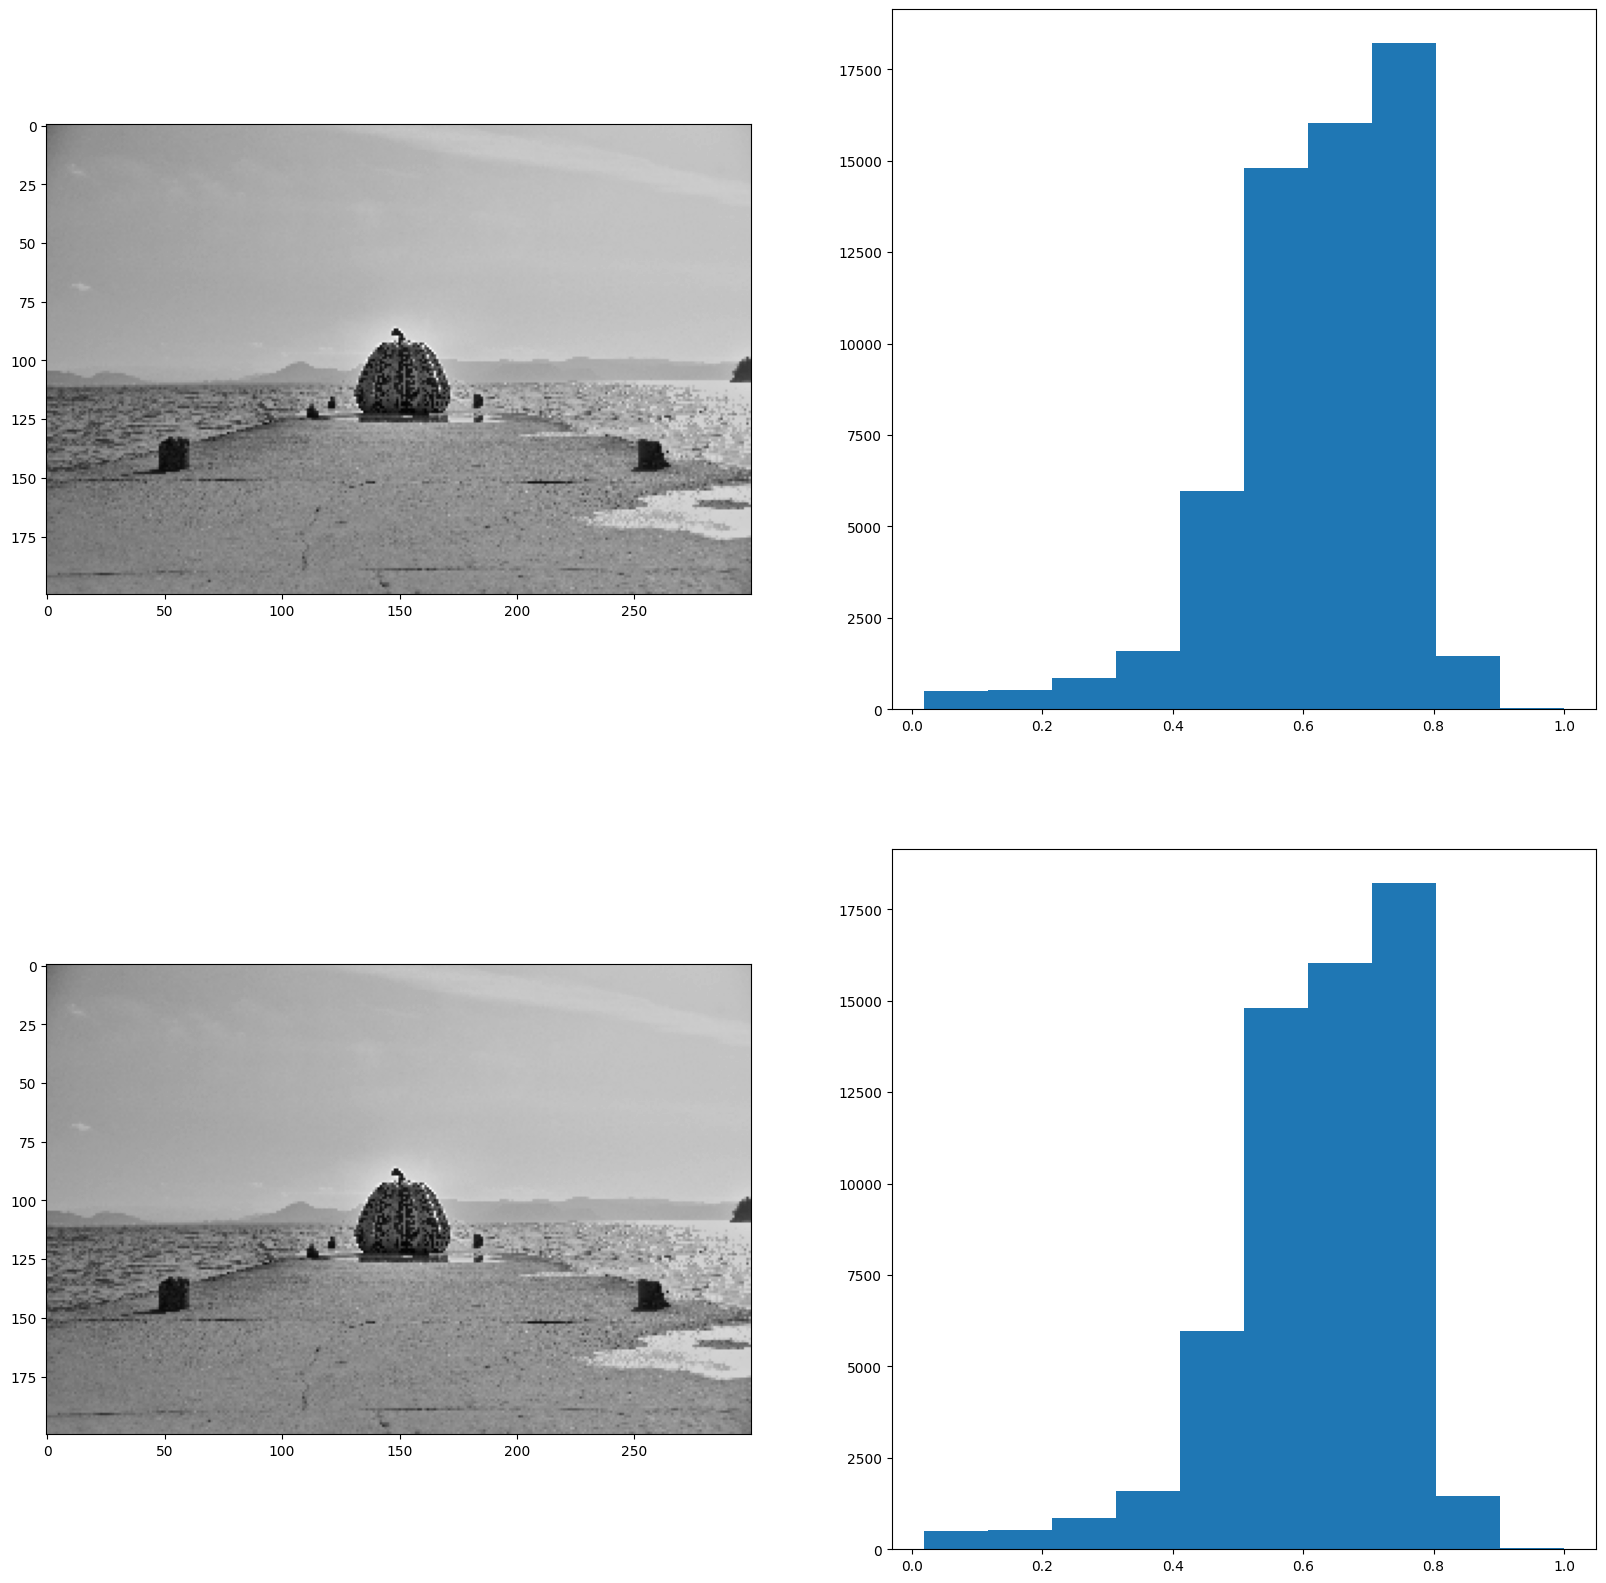

In [7]:
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torch
from torchvision.transforms.functional import resize, InterpolationMode
from torch.fft import fftn, ifftn, fftshift, ifftshift

img = read_image("/home/peerli/Documents/diffusionmodels/examples/img/DSC_1808.jpg") / 255
img = torch.mean(img, dim=0)
img = resize(img.unsqueeze(0), size=(200,300)).squeeze(0)
k = fftshift(fftn(img, dim=(0,1), norm="ortho"), dim=(0,1))
img2 = torch.abs(ifftn(k, dim=(0,1), norm="ortho"))

fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].imshow(img, cmap="gray")
ax[0,1].hist(img.view(-1))
ax[1,0].imshow(img2, cmap="gray")
ax[1,1].hist(img2.view(-1))